# Applying Monte Carlo simulations to forecast stock prices

### The original tutorial can be found [here](https://datascienceplus.com/how-to-apply-monte-carlo-simulation-to-forecast-stock-prices-using-python/) 

In [1]:
import numpy as np  
import pandas as pd  
from pandas_datareader import data as wb  
import matplotlib.pyplot as plt  
from scipy.stats import norm
%matplotlib inline

### First, we extract the stock data into a pandas dataframe

In [2]:
ticker = 'PG' 
data = pd.DataFrame()
data[ticker] = wb.DataReader(ticker, data_source='yahoo', start='2007-1-1')['Adj Close']

### Then, estimate its historical log returns

In [4]:
log_returns = np.log(1 + data.pct_change())
log_returns.tail()

,PG
Date,
2018-09-11,-0.004501
2018-09-12,0.013324
2018-09-13,0.004083
2018-09-14,0.001916
2018-09-17,0.004773


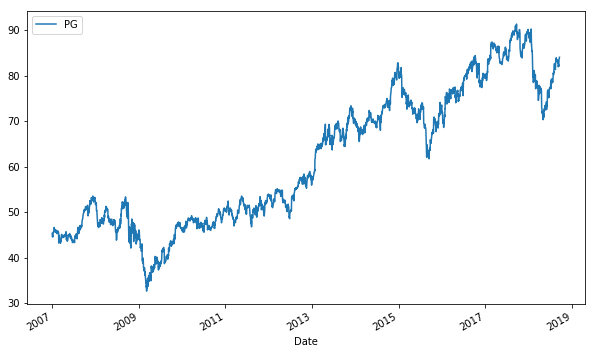

In [5]:
data.plot(figsize=(10, 6))

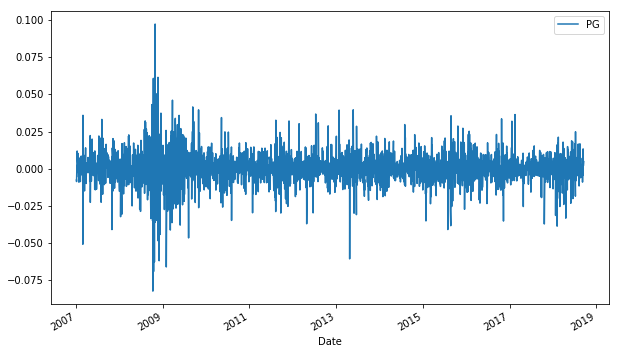

In [6]:
log_returns.plot(figsize = (10, 6))

### Take their mean and variance, for the future calculation of the Brownian motion.

In [7]:
u = log_returns.mean()
u

PG    0.000209
dtype: float64

In [8]:
var = log_returns.var()
var

PG    0.000118
dtype: float64

### Compute the drift component. It is the best approximation of future rates of return of the stock.

#### The formula to use here will be “U”, which equals the average log return, minus half its variance.

In [9]:
drift = u - (0.5 * var)
drift

PG    0.000151
dtype: float64

### Compute the Standard Deviation

In [10]:
stdev = log_returns.std()
stdev

PG    0.010844
dtype: float64

In [11]:
np.array(drift)
drift.values
stdev.values

array([0.01084406])

### If an event has a 95% chance of occurring, the distance between this event and the mean will be approximately 1.65 standard deviations

In [12]:
norm.ppf(0.95)

1.6448536269514722

In [14]:
x = np.random.rand(10, 2)
x

array([[0.52558824, 0.53668757],
       [0.11604889, 0.62704594],
       [0.69731639, 0.08450903],
       [0.69132353, 0.47544489],
       [0.92459659, 0.32711453],
       [0.94278152, 0.96635597],
       [0.98913223, 0.88816316],
       [0.25712347, 0.004912  ],
       [0.38068274, 0.81037346],
       [0.68803857, 0.13008413]])

In [15]:
norm.ppf(x)

array([[ 0.06418426,  0.09209211],
       [-1.19497249,  0.32403952],
       [ 0.51669766, -1.37536581],
       [ 0.49960543, -0.06158945],
       [ 1.43668743, -0.44789488],
       [ 1.57856028,  1.82974511],
       [ 2.29495769,  1.21681747],
       [-0.6522391 , -2.58196324],
       [-0.30368817,  0.87927336],
       [ 0.49029825, -1.12599351]])

### Now we can calculate the Z variable for the Brownian motion equation

In [16]:
Z = norm.ppf(np.random.rand(10,2))
Z

array([[-0.84861447, -1.3983506 ],
       [-1.74216191, -0.77614279],
       [-0.26293558, -2.18117039],
       [ 0.30936883, -0.9153197 ],
       [ 0.45379772,  0.61549958],
       [-0.74099088,  0.5855303 ],
       [ 0.80543704,  0.74032915],
       [ 2.52105976, -1.08023873],
       [-0.80029396,  0.94320494],
       [-0.5451848 , -0.77371789]])

### Specify the time intervals (days) and interactions (number of series of predictions to be generated)

In [17]:
t_intervals = 1000
iterations = 10

### The variable “daily returns” will show us what will equal “E” to the power of “R”

In [18]:
daily_returns = np.exp(drift.values + stdev.values * norm.ppf(np.random.rand(t_intervals, iterations)))

In [19]:
daily_returns

array([[1.01323425, 1.00337513, 1.02559017, ..., 1.00642659, 1.00080926,
        0.97120683],
       [0.98758412, 1.0014633 , 0.98614845, ..., 1.00490932, 0.99269801,
        0.98553319],
       [0.9962661 , 0.99890954, 0.9877034 , ..., 0.99126633, 1.0062481 ,
        0.99244927],
       ...,
       [1.01796186, 0.98816198, 0.97908811, ..., 1.0057128 , 0.99850012,
        1.0030552 ],
       [1.00279687, 1.02147888, 1.01494414, ..., 0.99704621, 0.99655654,
        0.99248292],
       [1.01302088, 1.02293462, 1.02189356, ..., 0.98317554, 0.98757931,
        0.98620319]])

### S0 is the current market price of the stock

In [20]:
S0 = data.iloc[-1]
S0

PG    84.010002
Name: 2018-09-17 00:00:00, dtype: float64

In [22]:
price_list = np.zeros_like(daily_returns)

In [23]:
price_list[0] = S0
price_list

array([[84.01000214, 84.01000214, 84.01000214, ..., 84.01000214,
        84.01000214, 84.01000214],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ]])

### Now we simply write down the formula for the expected stock price on day T.

In [24]:
for t in range(1, t_intervals):
    price_list[t] = price_list[t - 1] * daily_returns[t]

In [25]:
price_list

array([[ 84.01000214,  84.01000214,  84.01000214, ...,  84.01000214,
         84.01000214,  84.01000214],
       [ 82.96694413,  84.1329337 ,  82.84633326, ...,  84.42243392,
         83.39656236,  82.79464533],
       [ 82.65715377,  84.0411901 ,  81.82760474, ...,  83.68511658,
         83.91763218,  82.16948557],
       ...,
       [137.86382304,  84.28546908,  96.6409879 , ...,  80.19467473,
         81.24760745,  91.36902349],
       [138.24940985,  86.0958266 ,  98.08520473, ...,  79.95779626,
         80.96783468,  90.68219523],
       [140.04953923,  88.07040142, 100.23263861, ...,  78.61254951,
         79.96215849,  89.43106987]])

## And Voilá!

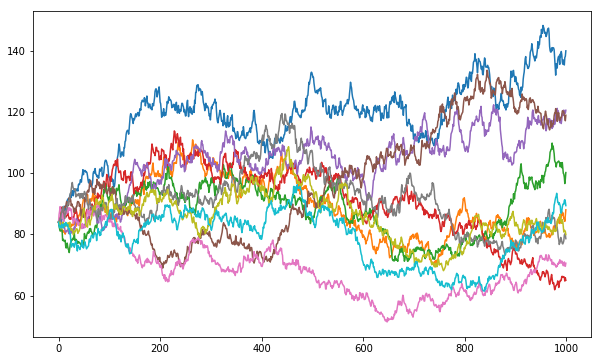

In [26]:
plt.figure(figsize=(10,6))
plt.plot(price_list);
